# Advanced Data Analysis 2023/24 - assignment 1

**NAME:** Manuel Pantaleo 

**NUMBER:** 59705

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on information about Olympic games. 


The data in the dataset provided was obtained from Kaggle.


### DEADLINE: 29-September-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt


## Datasets

For solving the questions posed, you have the following datasets available.

### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

The file structure is illustrated in the figure below:

![Olympic data](imgs/raw_athlete_events.png)

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.


In [3]:
dataFileName = os.path.join( "data", "athlete_events.csv")

dataDF = pd.read_csv(dataFileName)

display(dataDF.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
codesFileName = os.path.join( "data", "codes.csv")

codesDF = pd.read_csv(codesFileName)

display(codesDF.head(5))

,Country,ISO2,ISO3,ISON,IOC,FIPS,Plates,Domain
0,Afghanistan,AF,AFG,4.0,AFG,AF,AFG,.af
1,Åland Islands,AX,ALA,248.0,NaN,NaN,AX,.ax
2,Albania,AL,ALB,8.0,ALB,AL,AL,.al
3,Algeria,DZ,DZA,12.0,ALG,AG,DZ,.dz
4,American Samoa,AS,ASM,16.0,ASA,AQ,USA,.as


In [5]:
populationFileName = os.path.join( "data", "population.csv")

populationDF = pd.read_csv(populationFileName)

display(populationDF.head(5))

,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.0
1,afg,Afghanistan,1801,3280000.0
2,afg,Afghanistan,1802,3280000.0
3,afg,Afghanistan,1803,3280000.0
4,afg,Afghanistan,1804,3280000.0


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [5]:
dataDF.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**GENERAL NOTE:** In your computations, if there are rows for which needed information is missing, just drop the rows.

## Question 1 (7 points)

In this question, we start by exploring the data available with simple queries. In your answers, you can use the data computed in the previous answers if and when useful.


### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?



In [23]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
summer_athletes_count = dataDF[dataDF["Season"] == "Summer"]['ID'].nunique()
winter_athletes_count = dataDF[dataDF["Season"] == "Winter"]['ID'].nunique()

print(f"Athletes who participated in the Summer Olympics: {summer_athletes_count}")
print(f"Athletes who participated in the Winter Olympics: {winter_athletes_count}")

Athletes who participated in the Summer Olympics: 116776
Athletes who participated in the Winter Olympics: 18958


**Comment:** for this code I used ```.nunique()``` which calculates the number of unique distinct values in the 'ID' column.

### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?

Show the following information about each athelete: Name, Age, Team, Games, Sport and Event.


In [7]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
gold_winners = dataDF[dataDF["Medal"] == "Gold"]

youngest_winners = gold_winners.nsmallest(n=7, columns=["Age"])
oldest_winners = gold_winners.nlargest(n=6, columns=["Age"])
youngest_and_oldest_winners = pd.concat([youngest_winners, oldest_winners]).sort_values("Age")

youngest_and_oldest_winners[["Name", "Age", "Team", "Games", "Sport", "Event"]]

,Name,Age,Team,Games,Sport,Event
27207,Hans Bourquin,13.0,Switzerland,1928 Summer,Rowing,Rowing Men's Coxed Pairs
52010,Donna Elizabeth de Varona (-Pinto),13.0,United States,1960 Summer,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay
73581,Fu Mingxia,13.0,China,1992 Summer,Diving,Diving Women's Platform
78544,Marjorie Gestring (-Redlick),13.0,United States,1936 Summer,Diving,Diving Women's Springboard
119277,Kim Yun-Mi,13.0,South Korea,1994 Winter,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres..."
200704,Aileen Muriel Riggin (-Soule),13.0,United States,1920 Summer,Diving,Diving Women's Springboard
268602,Klaus Zerta,13.0,Germany,1960 Summer,Rowing,Rowing Men's Coxed Pairs
104003,Isaac Lazarus Israls,63.0,Netherlands,1928 Summer,Art Competitions,"Art Competitions Mixed Painting, Paintings"
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,Cincinnati Archers,1904 Summer,Archery,Archery Women's Team Round
226374,"Galen Carter ""G. C."" Spencer",63.0,Potomac Archers,1904 Summer,Archery,Archery Men's Team Round


**Comment:** I decided to show 7 result for youngest winners and 6 results for oldest winners because by showing only 3 per each group it would avoid 4 other 13 years old winners that being of the same age were excluded in the podium. Whereas for the oldest winners it would avoid 3 other players, being them all 63 years old. Thus, I think that this representation is fairer than if I would only have shown 3 results per each group.

### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [8]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

top_10_athletes = dataDF[dataDF["Medal"] == "Gold"].groupby("ID").agg(Gold_Medals=("Medal", "count"), Name=("Name", "first")).reset_index()
top_10_athletes_sorted = top_10_athletes.sort_values(by="Gold_Medals", ascending=False).head(10)
top_12_athlets_sorted = top_10_athletes.sort_values(by="Gold_Medals", ascending=False).head(12)


display(top_10_athletes_sorted[["ID", "Name", "Gold_Medals"]])
display(top_12_athlets_sorted[["ID", "Name", "Gold_Medals"]])

,ID,Name,Gold_Medals
7118,94406,"Michael Fred Phelps, II",23
2410,33557,"Raymond Clarence ""Ray"" Ewry",10
5046,67046,Larysa Semenivna Latynina (Diriy-),9
6637,87390,Paavo Johannes Nurmi,9
5207,69210,"Frederick Carlton ""Carl"" Lewis",9
8660,113912,Mark Andrew Spitz,9
4327,57998,Sawao Kato,8
906,13029,Usain St. Leo Bolt,8
2561,35550,Birgit Fischer-Schmidt,8
789,11642,"Matthew Nicholas ""Matt"" Biondi",8


,ID,Name,Gold_Medals
7118,94406,"Michael Fred Phelps, II",23
2410,33557,"Raymond Clarence ""Ray"" Ewry",10
5046,67046,Larysa Semenivna Latynina (Diriy-),9
6637,87390,Paavo Johannes Nurmi,9
5207,69210,"Frederick Carlton ""Carl"" Lewis",9
8660,113912,Mark Andrew Spitz,9
4327,57998,Sawao Kato,8
906,13029,Usain St. Leo Bolt,8
2561,35550,Birgit Fischer-Schmidt,8
789,11642,"Matthew Nicholas ""Matt"" Biondi",8


**Comment:** here we have the same situation as the previous exercise. By looking at the first table we can see the top 10 athlets who won a gold medal but if we only consider those 10 we do not take into account that there are two additional athlets who won 8 gold medals whose age is 8 years old as well. Thus, in this way we have a fairer result.

### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

Show the following information: Year, Name of athlete, and number of medals.

In [26]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

summer_data = dataDF[(dataDF['Season'] == 'Summer') & (dataDF['Year'] > 1950)]
athlete_medal_count = summer_data.groupby(['Year', 'Name'])['Medal'].count().reset_index()
athlete_top_medals = athlete_medal_count.loc[athlete_medal_count.groupby('Year')['Medal'].idxmax()]

athlete_top_medals.columns = ['Year', 'Name', 'Num_Medals']
display(athlete_top_medals[['Year', 'Name', 'Num_Medals']])


,Year,Name,Num_Medals
3142,1952,Mariya Kindrativna Horokhovska,7
6790,1956,Larysa Semenivna Latynina (Diriy-),6
8897,1960,Borys Anfiyanovych Shakhlin,7
16459,1964,Larysa Semenivna Latynina (Diriy-),6
22413,1968,Mikhail Yakovlevich Voronin,7
28677,1972,Mark Andrew Spitz,7
35584,1976,Nikolay Yefimovich Andrianov,7
37658,1980,Aleksandr Nikolayevich Dityatin,8
46514,1984,Li Ning,6
54817,1988,"Matthew Nicholas ""Matt"" Biondi",7


**Comment:** here I first filtered the data for Summer Olympics after 1950, then I grouped it by Year and Name, and counted the number of medals each athlete won in each edition. Finally, I identified the athlete with the most medals in each edition and displayed the Year, Name of the athlete, and the number of medals they won.

### 1.e) For each athlete, compute the number of gold, silver and bronze medals she/he has won.

**Suggestions:** two alternative suggestion are investigating pivot tables and custom defined aggregation functions.


In [27]:
pivot_table = dataDF.pivot_table(index='Name', columns='Medal', values='Event', aggfunc='count', fill_value=0)

pivot_table.columns = ['Bronze', 'Gold', 'Silver']

pivot_table = pivot_table.reset_index()
sorted_pivot_table = pivot_table.sort_values(by="Gold",ascending=False)
display(sorted_pivot_table)

,Name,Bronze,Gold,Silver
18078,"Michael Fred Phelps, II",2,23,3
21409,"Raymond Clarence ""Ray"" Ewry",0,10,0
15306,Larysa Semenivna Latynina (Diriy-),4,9,5
17311,Mark Andrew Spitz,1,9,1
20099,Paavo Johannes Nurmi,0,9,3
...,...,...,...,...
15140,Kyle Gie Brown,1,0,0
5256,David Price,1,0,0
5257,David Prinosil,1,0,0
5258,David Robert Clark,0,0,1


### 1.f) For the games of 2016, print the table of medals for each country.

**NOTE:** for collective events (e.g. football, 4*100 meters), you should count only one medal for a given event.
In the cell after the code, explain the rationale of the code to achieve this goal - your solution does not need to be perfect, but only an approximation of the real value.


In [22]:
medals2016 = dataDF[(dataDF["Year"]==2016)&(~dataDF["Medal"].isna())]

medals2016 = medals2016[["ID","NOC","Medal","Event"]].groupby(["Medal","Event"]).first().reset_index()
medals2016 = medals2016[["NOC","Medal","ID"]].groupby(["NOC","Medal"]).count().reset_index()
medals2016 = medals2016.pivot(index="NOC",columns="Medal",values="ID")
medals2016 = medals2016.fillna(0)
medals2016 = medals2016[["Gold","Silver","Bronze"]]
display(medals2016.nlargest(10,["Gold","Silver","Bronze"]))

Medal,Gold,Silver,Bronze
NOC,,,
USA,46.0,36.0,37.0
GBR,27.0,23.0,15.0
CHN,26.0,18.0,23.0
RUS,19.0,17.0,19.0
GER,17.0,10.0,11.0
JPN,12.0,8.0,19.0
FRA,10.0,18.0,13.0
KOR,9.0,3.0,6.0
ITA,8.0,12.0,8.0


**Rationale:** 
- Filtering: The code selects data for the 2016 Olympic Games where medals were awarded.
- Grouping and Reshaping: It groups the data by country ("NOC") and medal type ("Medal"), then reshapes it to have countries as rows and medal types as columns, with counts of medals as values.
- Handling Missing Values: Any missing values (countries with no medals of a certain type) are filled with zeros.
- Sorting and Displaying: The top 10 countries with the highest counts of gold, silver, and bronze medals combined are displayed.

## Question 2 (2 points)

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.




### 2.a) For the games of 2016, print the table of medals for each country per million inhabitants.



In [25]:
populationDF["geo"]=populationDF["geo"].str.upper()
population2016DF = populationDF[populationDF["time"]==2016]
medalsPerMillion = medals2016.join(codesDF.set_index("IOC"),how="inner").set_index("ISO3")\
                            .join(population2016DF.set_index("geo"),how="inner")
medalsPerMillion["Gold1M"] = medalsPerMillion["Gold"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion["Silver1M"] = medalsPerMillion["Silver"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion["Bronze1M"] = medalsPerMillion["Bronze"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion = medalsPerMillion[["name","Gold1M","Silver1M","Bronze1M"]]
display(medalsPerMillion.nlargest(10,["Gold1M","Silver1M","Bronze1M"]))

,name,Gold1M,Silver1M,Bronze1M
BHS,Bahamas,2.525406,0.000000,2.525406
JAM,Jamaica,2.140797,1.070398,0.713599
HRV,Croatia,1.183782,0.710269,0.236756
FJI,Fiji,1.088885,0.000000,0.000000
NZL,New Zealand,0.856883,1.927987,1.071104
HUN,Hungary,0.815070,0.305651,0.407535
BHR,Bahrain,0.709390,0.709390,0.000000
GEO,Georgia,0.530348,0.265174,1.060696
SVN,Slovenia,0.478464,0.956929,0.000000
NLD,Netherlands,0.467167,0.408771,0.175188


## Question 3 (4 points)

This third question focus on processing the information on a time series for plotting it.


### 3.a) Display the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Select a country that has a significative number of medals and plot the results.
Discuss the rationale of your solution, including why you have decided to show the lines you are presenting and any processing you have done to the lines.


Number of Medals & Number of Athletes for the last 5 Olympic Games for NED:
    Year  Season   ID  Medal
42  2008  Summer  237     61
43  2010  Winter   32     11
44  2012  Summer  173     69
45  2014  Winter   39     29
46  2016  Summer  237     47


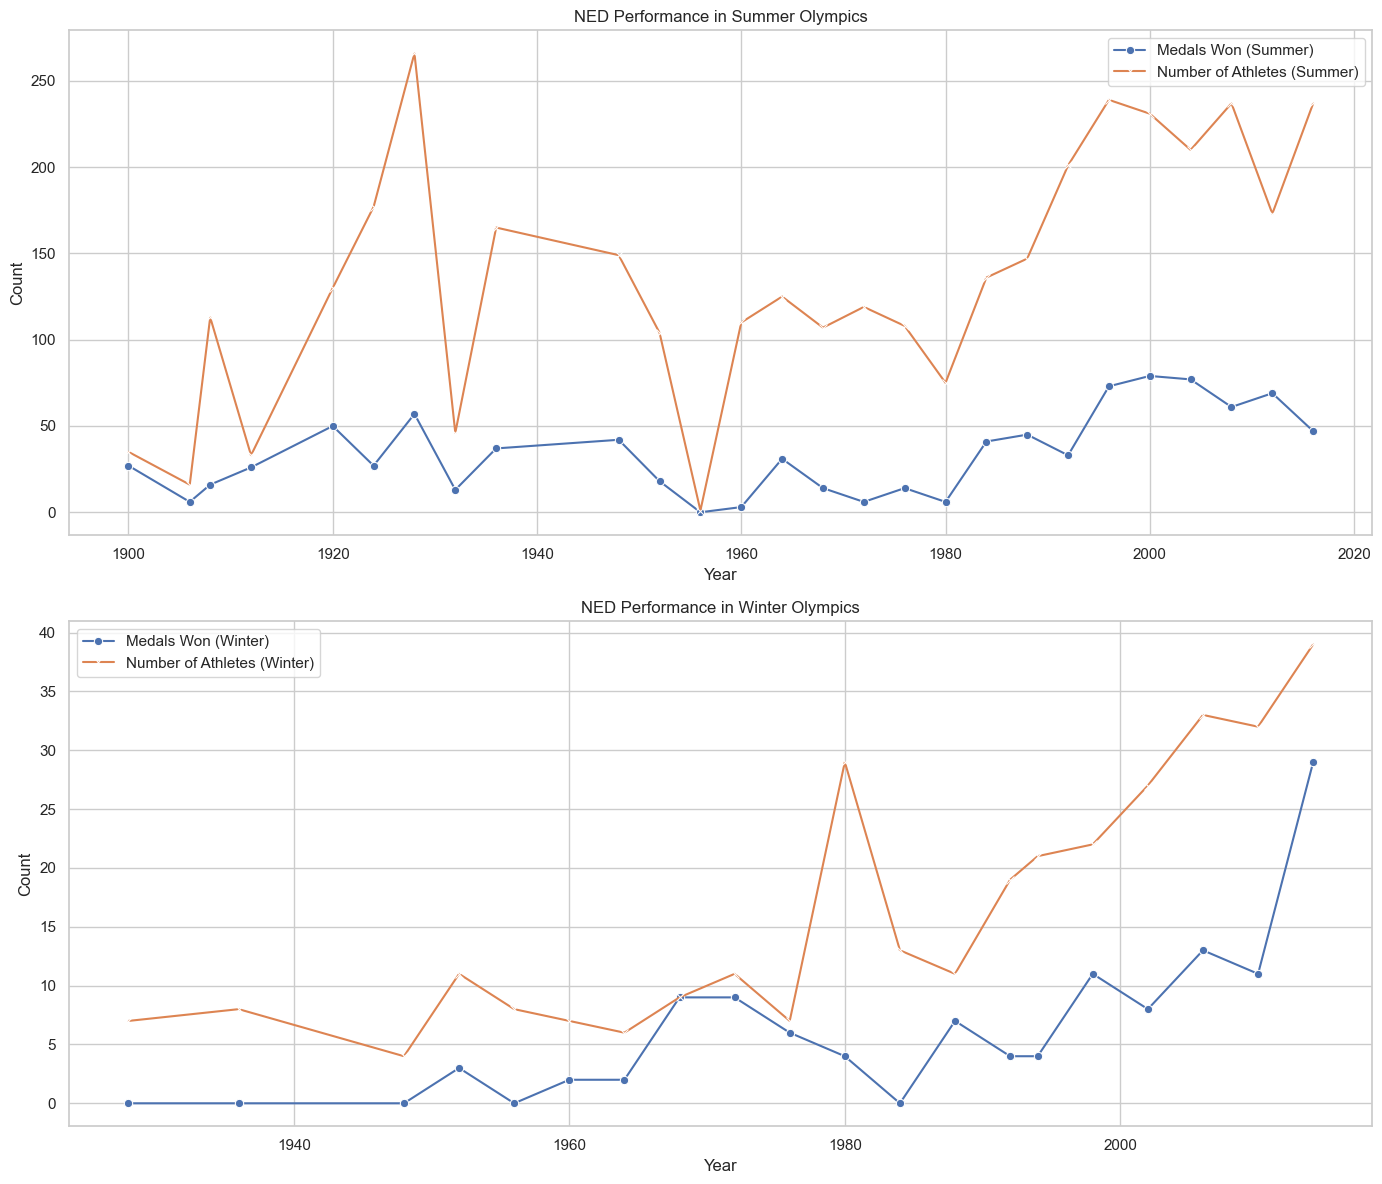

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the selected country
selected_country = 'NED'

# Filter the data for the selected country
country_data = dataDF[dataDF['NOC'] == selected_country]

# Group the data by Year and Season and calculate the number of unique athletes and medals won
grouped_data = country_data.groupby(['Year', 'Season']).agg({'ID': 'nunique', 'Medal': 'count'}).reset_index()

# Separate the data for Summer and Winter Olympics
summer_data = grouped_data[grouped_data['Season'] == 'Summer']
winter_data = grouped_data[grouped_data['Season'] == 'Winter']

# Print the number of medals and athletes for the last 5 Olympic Games
print(f'Number of Medals & Number of Athletes for the last 5 Olympic Games for {selected_country}:')
print(grouped_data.tail())

# Set seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot Summer Olympics data using seaborn
sns.lineplot(data=summer_data, x='Year', y='Medal', marker='o', label='Medals Won (Summer)', ax=axes[0])
sns.lineplot(data=summer_data, x='Year', y='ID', marker='x', label='Number of Athletes (Summer)', ax=axes[0])
axes[0].set_title(f'{selected_country} Performance in Summer Olympics')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot Winter Olympics data using seaborn
sns.lineplot(data=winter_data, x='Year', y='Medal', marker='o', label='Medals Won (Winter)', ax=axes[1])
sns.lineplot(data=winter_data, x='Year', y='ID', marker='x', label='Number of Athletes (Winter)', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].set_title(f'{selected_country} Performance in Winter Olympics')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**Rationale:** 

- Data Filtering: The code begins by defining the selected country as 'NED' and then filters the dataDF DataFrame to include only data related to the Netherlands.
- Data Grouping and Aggregation: It groups the filtered data by 'Year' and 'Season' (Summer or Winter) and performs aggregation on two columns which are 'ID' and 'Medal'. ID represents the number of athletes from the Netherlands and 'Medal' counts the medals won by Dutch athletes.
- Separation for Summer and Winter Olympics: here the code separates the grouped data into two DataFrames, summer_data and winter_data, based on the season. This separation is essential as it allows for separate plotting and analysis of Summer and Winter Olympic performance.
- Printing and Displaying Data: here I printed the number of medals and athletes for the last 5 Olympic Games for the Netherlands, providing a clear overview of the historical performance.
- Data Visualization: Here I used the Seaborn library for data visualization.
- Creating Subplots: the code here creates two subplots within a single figure to display Summer and Winter Olympic data side by side. This arrangement enables easy comparison between the two seasons. 
- Plotting with Seaborn: for both subplots i used Seaborn's lineplot function to plot the data'Year' on the x-axis and 'Medal' and 'Number of Athletes' on the y-axis. Different markers and labels are used to distinguish between medals won and the number of athletes.
- Layout and Display: The layout is adjusted to ensure that the subplots are neatly arranged and don't overlap. Finally, plt.show() is called to display the plots.

### 3.b) Display trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, plot trend lines.



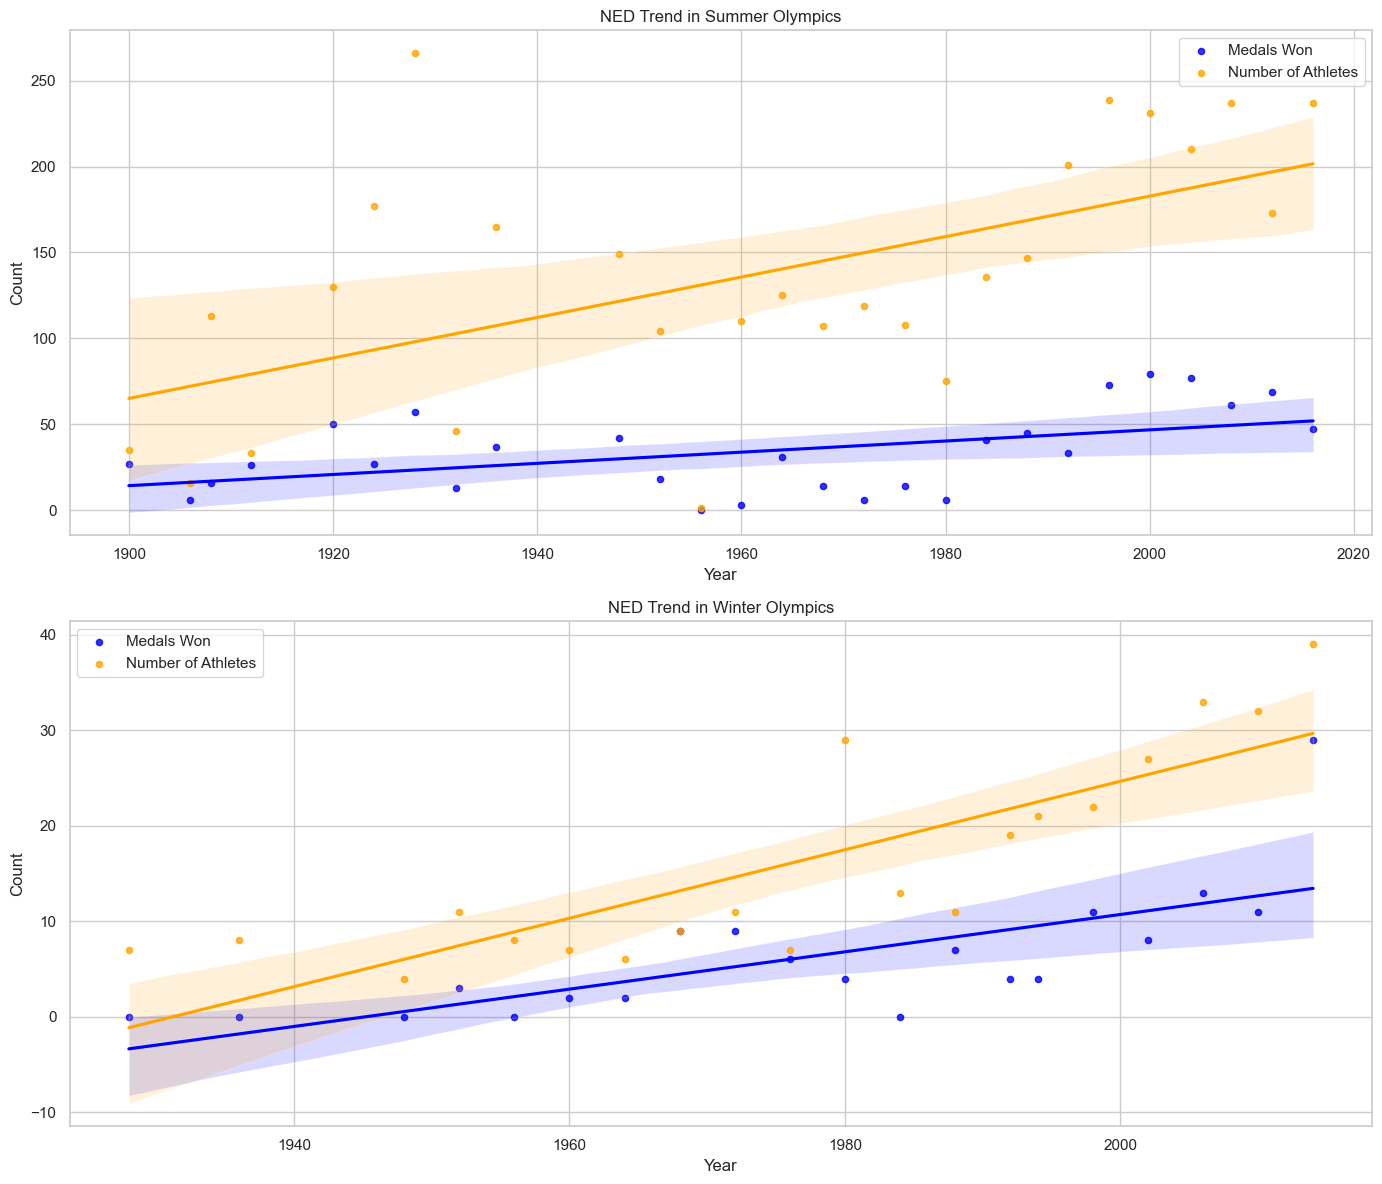

In [14]:
#Solve question here. Briefly justy you solution in the following markdown cell.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the selected country
selected_country = 'NED'

# Filter the data for the selected country
country_data = dataDF[dataDF['NOC'] == selected_country]

# Group the data by Year and Season and calculate the number of unique athletes and medals won
grouped_data = country_data.groupby(['Year', 'Season']).agg({'ID': 'nunique', 'Medal': 'count'}).reset_index()

# Separate the data for Summer and Winter Olympics
summer_data = grouped_data[grouped_data['Season'] == 'Summer']
winter_data = grouped_data[grouped_data['Season'] == 'Winter']

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot trends for Summer Olympics
sns.regplot(x='Year', y='Medal', data=summer_data, ax=axes[0], label='Medals Won', color='blue', scatter_kws={'s': 20}, line_kws={'color': 'blue'})
sns.regplot(x='Year', y='ID', data=summer_data, ax=axes[0], label='Number of Athletes', color='orange', scatter_kws={'s': 20}, line_kws={'color': 'orange'})
axes[0].set_title(f'{selected_country} Trend in Summer Olympics')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot trends for Winter Olympics
sns.regplot(x='Year', y='Medal', data=winter_data, ax=axes[1], label='Medals Won', color='blue', scatter_kws={'s': 20}, line_kws={'color': 'blue'})
sns.regplot(x='Year', y='ID', data=winter_data, ax=axes[1], label='Number of Athletes', color='orange', scatter_kws={'s': 20}, line_kws={'color': 'orange'})
axes[1].set_title(f'{selected_country} Trend in Winter Olympics')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


**Rationale:** 
- Data Filtering:I started by filtering the dataset (dataDF) to select data only for the specified country, which is 'NED' (Netherlands). This step ensures that the analysis and visualization are focused on the chosen country.
- Data Grouping:Next, I filtered data by grouping by 'Year' and 'Season' (Summer or Winter). For each group, I calculated two metrics the number of unique athletes ('ID') representing the count of athletes from the country participating in that specific year and season and the number of medals won ('Medal') representing the count of medals won by the country in that specific year and season.
- Separation of Summer and Winter Data: Next, I separeted the DataFrames, creating the summer_data and the winter_data. This separation allows for distinct trend analysis for each season.
- Visualization: Then I created two Subplots with two rows, each representing a specific Olympic season (Summer and Winter). For each subplot i used Seaborn's regplot to create trend lines. Then I plotted The trend line for 'Medals Won' in blue, and 'Number of Athletes' in orange. Then I used the scatter_kws and line_kws parameters to customize the appearance of the points and trend lines.
- Layout and Display: Finally I displayed the plots


## Question 4 (5 points)

This third question focus on understanding the relations between elements.


### 4.a) Is there any relation between the medals won by different countries?

Study the relation in the evolution of medals won by different countries over the years.

Select four countries with a significative number of medals.

Note: Some useful
* Drop columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
* Rename columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)


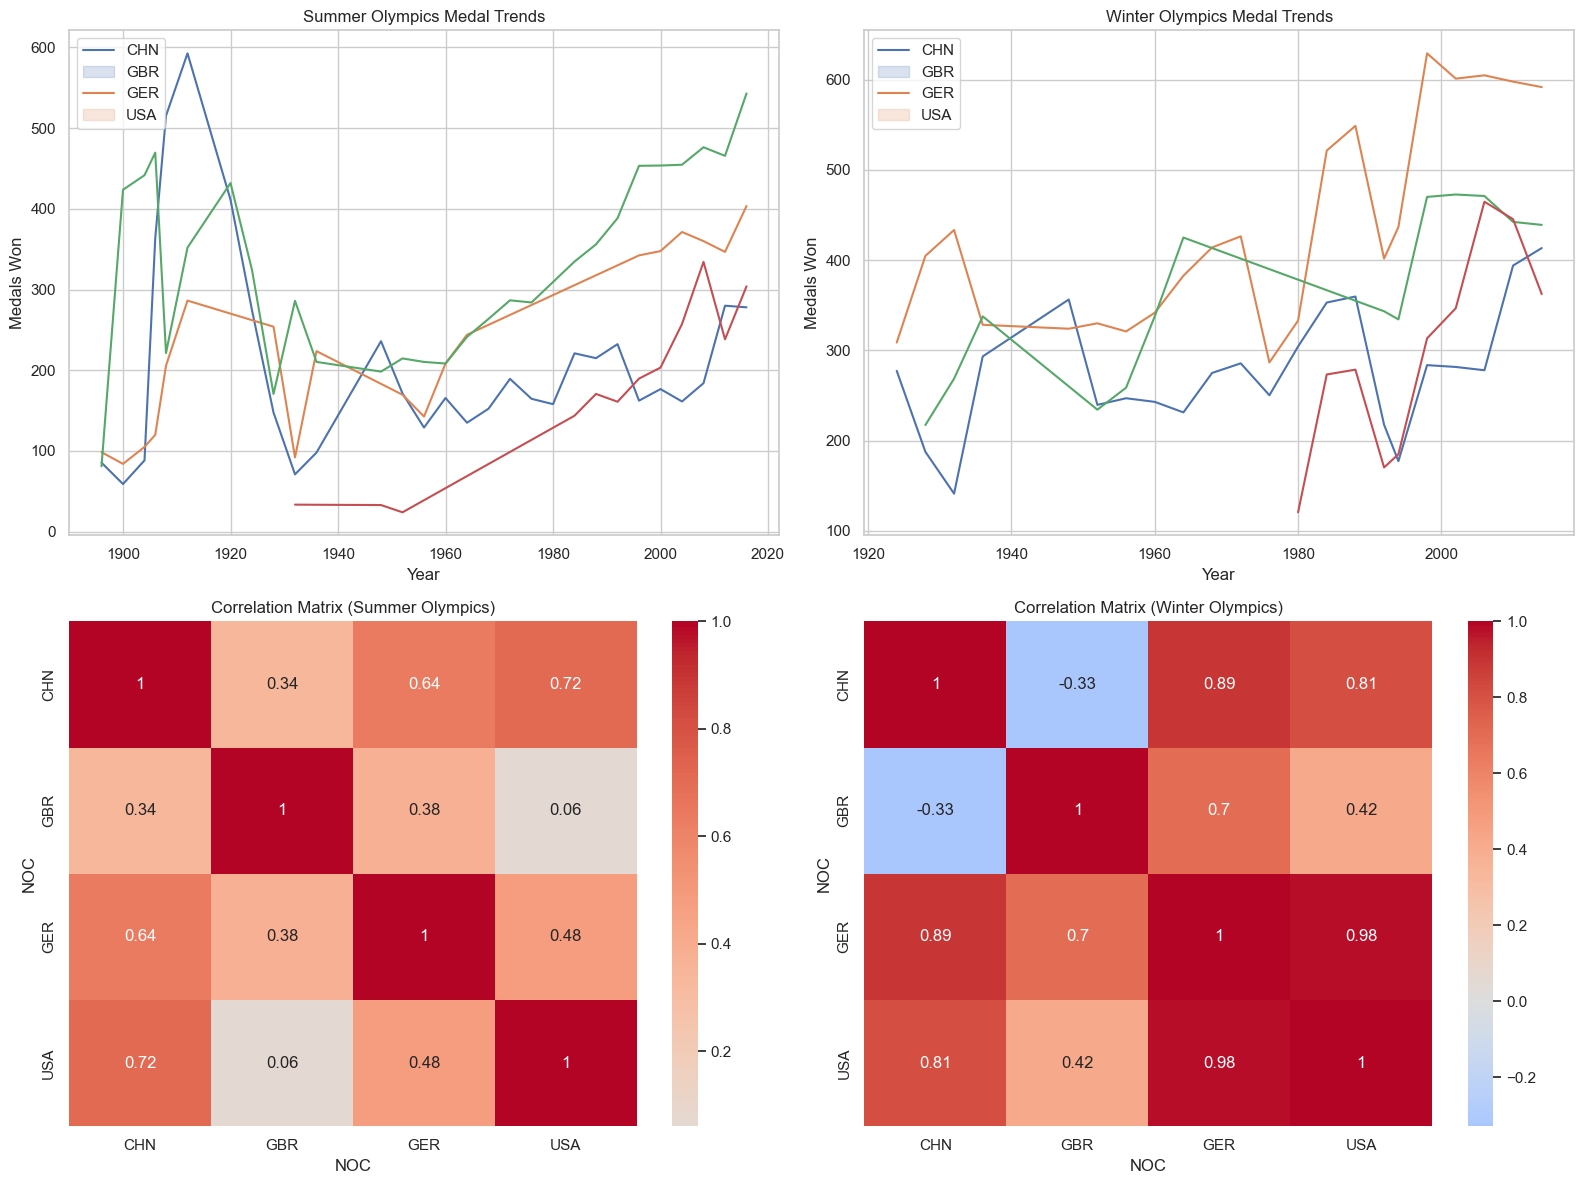

In [15]:
#Solve question here. Briefly justify your solution in the following markdown cell.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the selected countries
selected_countries = ['CHN', 'GBR', 'GER', 'USA']

# Filter the data for the selected countries
filtered_data = dataDF[dataDF['NOC'].isin(selected_countries)]

# Group the data by Year, Season, and NOC, and calculate the total medals won
grouped_data = filtered_data.groupby(['Year', 'Season', 'NOC']).size().reset_index(name='Medals_Won')

# Calculate central moving average for smoother plots
grouped_data['Medals_Won_Smoothed'] = grouped_data.groupby('NOC')['Medals_Won'].transform(lambda x: x.rolling(window=3, center=True, min_periods=1).mean())

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot Summer Olympics trends
sns.lineplot(data=grouped_data[grouped_data['Season'] == 'Summer'], x='Year', y='Medals_Won_Smoothed', hue='NOC', ax=axes[0, 0])
axes[0, 0].set_title('Summer Olympics Medal Trends')
axes[0, 0].set_ylabel('Medals Won')
axes[0, 0].legend(selected_countries, loc='upper left')

# Plot Winter Olympics trends
sns.lineplot(data=grouped_data[grouped_data['Season'] == 'Winter'], x='Year', y='Medals_Won_Smoothed', hue='NOC', ax=axes[0, 1])
axes[0, 1].set_title('Winter Olympics Medal Trends')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Medals Won')
axes[0, 1].legend(selected_countries, loc='upper left')

# Calculate and plot the correlation matrix
correlation_matrix_summer = grouped_data[grouped_data['Season'] == 'Summer'].pivot_table(index='Year', columns='NOC', values='Medals_Won', aggfunc='sum').corr()
correlation_matrix_winter = grouped_data[grouped_data['Season'] == 'Winter'].pivot_table(index='Year', columns='NOC', values='Medals_Won', aggfunc='sum').corr()

sns.heatmap(correlation_matrix_summer, annot=True, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix (Summer Olympics)')
sns.heatmap(correlation_matrix_winter, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix (Winter Olympics)')

plt.tight_layout()
plt.show()


**Present an interpretation of the results here:** to be completed

Summer Olympics:    

- There is a a correlation of 0.72 between the United States and China which indicates a relatively strong positive linear relationship between the number of medals won by these two countries in this given context. This means that when the USA tends to win more medals in a particular year, China also tends to win more medals in the same year, and this relationship is relatively strong.

- There is also a positive correlation of 0.64 between Germany and China which indicates a moderate to strong positive linear relationship between these two. Meaning that when germany tends to win more medals in a particular year, CHN also tends to win more medals in the same year, and the relationship is relatively strong.

- For the other countries, the relationship is not as strong; instead, it represents a relatively weaker positive linear association between their respective medal counts

Winter Olympics:   

- Germany and China have a very strong positive correlation of 0.89. This suggests that over the years, these two countries' performances in terms of medal counts have been highly synchronized in a positive direction. When one country performs well and wins more medals, the other tends to do the same.

- The United States (USA) and China (CHN) also exhibit a strong positive correlation of 0.81. This indicates a significant positive relationship between the medal counts of these two nations. When one country performs better in the Olympics, the other tends to follow a similar pattern.

- The United States (USA) and Germany (GER) have an exceptionally high correlation of 0.98. This implies an almost perfect positive linear relationship between their medal counts. These two countries' performances have closely mirrored each other over the years, suggesting a shared dominance in Olympic events.

- In contrast, Great Britain (GBR) and China (CHN) display a negative correlation of -0.33. This negative relationship suggests that when one country's medal count increases, the other's tends to decrease, and vice versa. It indicates an inverse pattern in their Olympic performances.

Overall, these correlations highlight the varying degrees of synchronization and patterns in the performances of these countries across different Olympic seasons. While the United States and Germany consistently exhibit strong positive correlations, other countries like China and Great Britain may have more complex and dynamic relationships in their medal counts.

### 4.b) Extended analysis

As medals are competitive, one could expect that the fact that some countries starts winning more medals leads other countries to win less medals. But this would only be true if the total number of medals would have remained constant.

Suggest an alternative analysis and implement it.



**Analysis proposed:** Correlation Analysis of Normalized Medals


**Rationale of implementation:** The objective of this analysis is to gain insights into the performance of different countries in the Olympic Games by considering the total number of medals available in each Olympic year. This approach allows us to normalize the medal counts, accounting for variations in the number of medals awarded over the years, and calculate correlations between countries' performances in both Summer and Winter Olympic Games.

<Axes: xlabel='Year'>

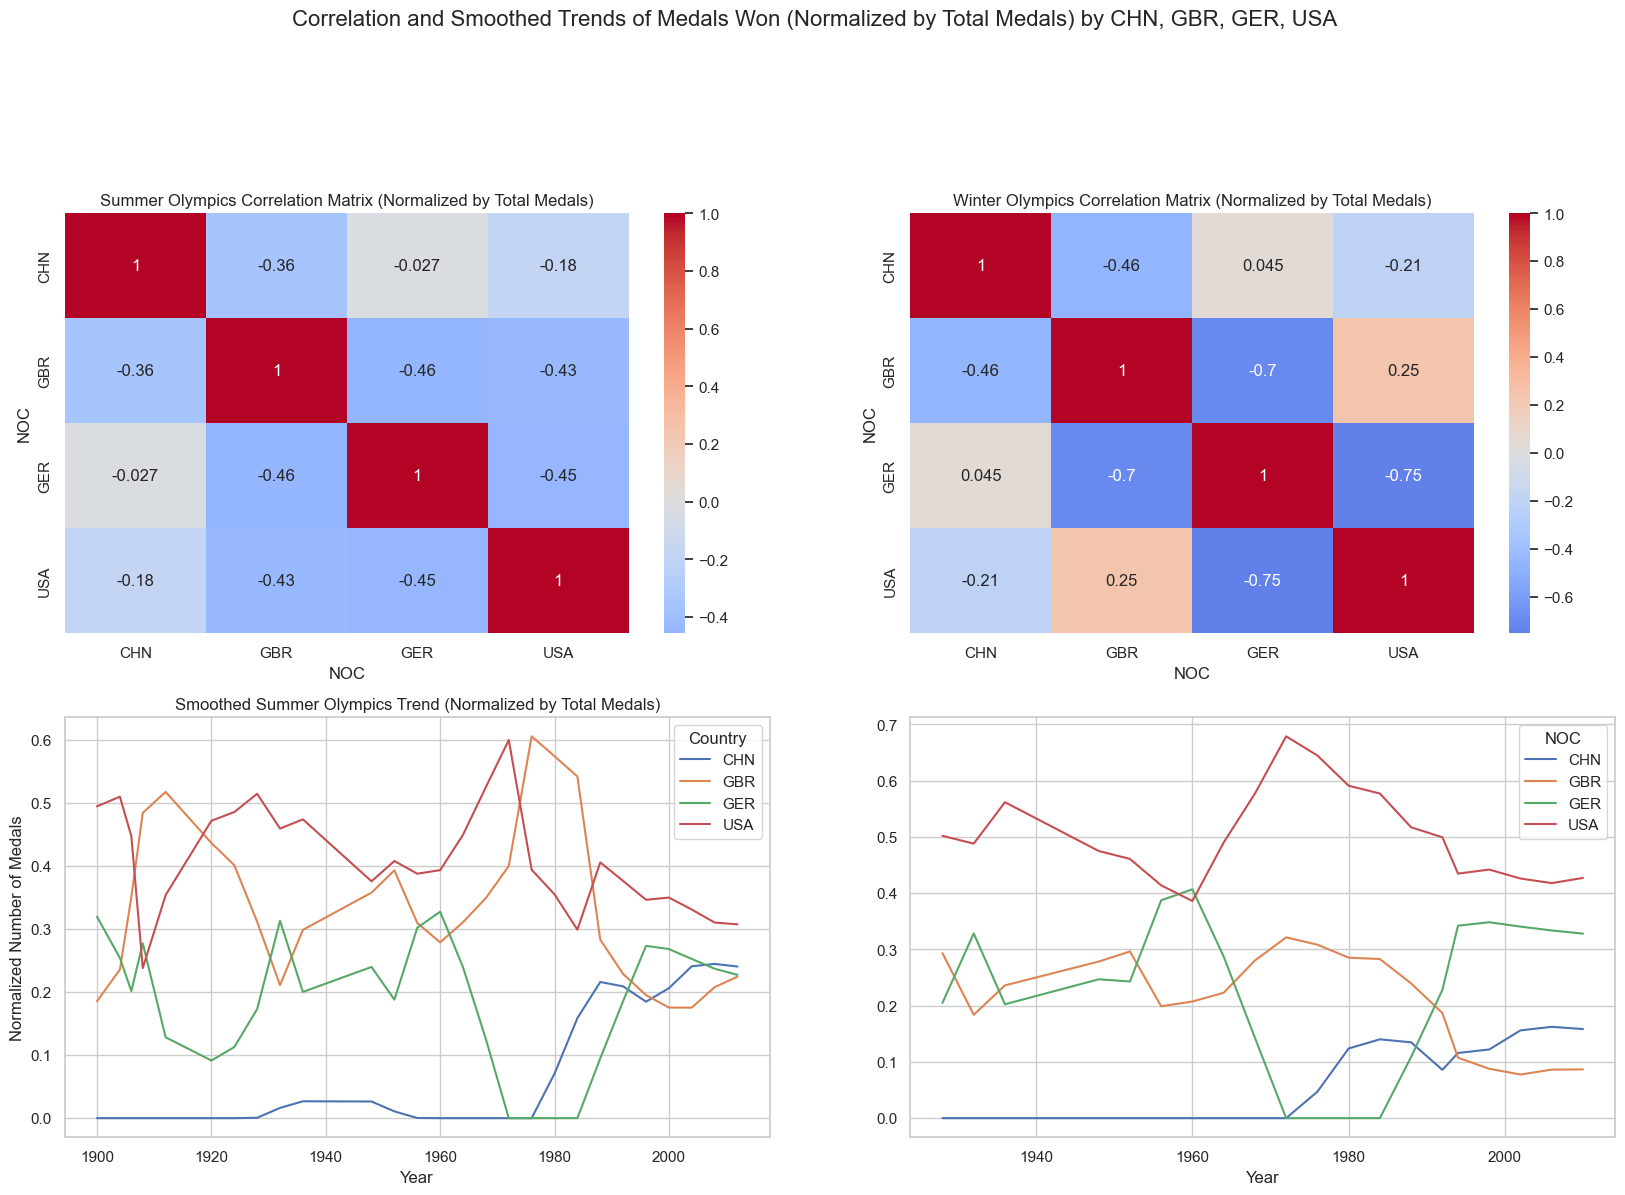

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the countries of interest
top_countries_normalized_total = ['CHN', 'GBR', 'GER', 'USA']

# Filter data for the selected countries and relevant seasons
filtered_data = dataDF[(dataDF['NOC'].isin(top_countries_normalized_total)) &
                       ((dataDF['Season'] == 'Summer') | (dataDF['Season'] == 'Winter'))]

# Group by Year, Season, and NOC to calculate the Medals_Won and Medals_Won_Total
dataDF_countries_years_medal_counts = filtered_data.groupby(['Year', 'Season', 'NOC']).size().reset_index(name='Medals_Won')
total_medals_each_year = dataDF_countries_years_medal_counts.groupby(['Year', 'Season'])['Medals_Won'].sum().reset_index()

# Merge the total medals available with the previously created dataframe to obtain the normalized medals count
merged_data = pd.merge(dataDF_countries_years_medal_counts, total_medals_each_year, on=['Year', 'Season'], suffixes=('', '_Total'))
merged_data['Normalized_Medals_Total'] = merged_data['Medals_Won'] / merged_data['Medals_Won_Total']

# Create pivot tables for Summer and Winter seasons
summer_data_normalized_total = merged_data[(merged_data['Season'] == 'Summer')]
winter_data_normalized_total = merged_data[(merged_data['Season'] == 'Winter')]

summer_pivot_normalized_total = summer_data_normalized_total.pivot(index='Year', columns='NOC', values='Normalized_Medals_Total').fillna(0)
winter_pivot_normalized_total = winter_data_normalized_total.pivot(index='Year', columns='NOC', values='Normalized_Medals_Total').fillna(0)

# Calculate correlation matrices for Summer and Winter
summer_corr_normalized_total = summer_pivot_normalized_total.corr()
winter_corr_normalized_total = winter_pivot_normalized_total.corr()

# Create smoothed trends using a moving average function (central_moving_average)
def central_moving_average(series, window=3):
    return series.rolling(window, center=True).mean()

summer_pivot_normalized_total_smoothed = summer_pivot_normalized_total.apply(central_moving_average)
winter_pivot_normalized_total_smoothed = winter_pivot_normalized_total.apply(central_moving_average)

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle(f"Correlation and Smoothed Trends of Medals Won (Normalized by Total Medals) by {', '.join(top_countries_normalized_total)}", fontsize=16, y=1.05)

sns.heatmap(summer_corr_normalized_total, annot=True, cmap='coolwarm', center=0, ax=axes[0, 0])
axes[0, 0].set_title('Summer Olympics Correlation Matrix (Normalized by Total Medals)')
summer_pivot_normalized_total_smoothed.plot(ax=axes[1, 0])
axes[1, 0].set_title("Smoothed Summer Olympics Trend (Normalized by Total Medals)")
axes[1, 0].set_ylabel("Normalized Number of Medals")
axes[1, 0].legend(title="Country")

sns.heatmap(winter_corr_normalized_total, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Winter Olympics Correlation Matrix (Normalized by Total Medals)')
winter_pivot_normalized_total_smoothed.plot(ax=axes[1, 1])


**Rationale and comments:** We notice various changes when comparing the correlation coefficients between the original data and the normalised data:

Summer Olympics: Germany and China show a moderate negative correlation (-0.36) in the Summer Olympic compared         to the one performed earlier which was way bigger (0.64). The United States and China now display a negative           correlation of -0.18 compared to 0.72 obtained earlier. Also the correlation between the United States and             Germany is -0.45 now which is way smaller of the one computed earlier 0.98. On the other hand Great Britain and       China still exhibit a moderate negative correlation of -0.33 which is the samne as the one obtained earlier.

Winter Olympics: The United States and China display a modest negative correlation of -0.21 which is way smaller       than the one obtained earlier of 0.81. The correlation between the United States and Germany in the Winter             Olympics is notably strong and negative (-0.75) while before was 0.98. Great Britain and China demonstrate a           moderate negative correlation -0.46 which is slightly more than the obtained in the previous analysis.

This approach provides a more equitable comparison of countries' Olympic performances by normalizing medal counts. It takes into account not only the number of medals won but also the total medals available, making it a fairer measure of relative performance. The correlation analysis reveals relationships and dependencies among countries' successes in different Olympic years and seasons. By following this methodology, we can uncover valuable insights into the dynamics of Olympic achievements across various countries and seasons.

## Question 5 (2 points)

This group focus on implementation using Spark SQL.

### 5.a) Reimplement question 1.e in Spark SQL.


In [35]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# for each athlete, compute the number of gold, silver and bronze medals she/he has won.

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, when, col

spark = SparkSession.builder \
.master("local") \
.appName("Simple test") \
.config("spark.sql.execution.arrow.pyspark.enabled", "true") \
.getOrCreate()

atFilename = "athlete_events.csv"

# Read a CSV file into a DataFrame
df = spark.read.option("header", True).option("inferSchema",True).csv(atFilename)
df.createOrReplaceTempView("data")


24/06/03 16:32:10 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [36]:
spark.sql("""SELECT FIRST(Name) Name, COUNT(*) as Medals FROM data
                  WHERE Medal <> "NA"
                  GROUP BY ID
                  ORDER BY Medals DESC
                  LIMIT 10
          """).show()

+--------------------+------+
|                Name|Medals|
+--------------------+------+
|Michael Fred Phel...|    28|
|Larysa Semenivna ...|    18|
|"William Henry ""...|    16|
|Nikolay Yefimovic...|    15|
| Ole Einar Bjrndalen|    13|
| Edoardo Mangiarotti|    13|
|         Takashi Ono|    13|
|Borys Anfiyanovyc...|    13|
|Birgit Fischer-Sc...|    12|
|          Sawao Kato|    12|
+--------------------+------+



In [37]:
spark.sql("""SELECT n.name, CASE WHEN ISNULL(Gold) THEN 0 ELSE Gold END Gold,
                        CASE WHEN ISNULL(Silver) THEN 0 ELSE Silver END Silver,
                        CASE WHEN ISNULL(Bronze) THEN 0 ELSE Bronze END Bronze FROM
                  (SELECT id,COUNT(*) Gold FROM data WHERE Medal = "Gold" GROUP BY id) g FULL OUTER JOIN
                  (SELECT id,COUNT(*) Silver FROM data WHERE Medal = "Silver" GROUP BY id) s ON g.id = s.id FULL OUTER JOIN
                  (SELECT id,COUNT(*) Bronze FROM data WHERE Medal = "Bronze" GROUP BY id) b ON g.id = b.id LEFT JOIN
                  (SELECT id, FIRST(name) name FROM data GROUP BY id) n ON g.id = n.id
                  ORDER BY Gold DESC, Silver DESC, Bronze DESC
                  LIMIT 10
          """).show()

+--------------------+----+------+------+
|                name|Gold|Silver|Bronze|
+--------------------+----+------+------+
|Michael Fred Phel...|  23|     3|     2|
|"Raymond Clarence...|  10|     0|     0|
|Larysa Semenivna ...|   9|     5|     4|
|Paavo Johannes Nurmi|   9|     3|     0|
|   Mark Andrew Spitz|   9|     1|     1|
|"Frederick Carlto...|   9|     1|     0|
| Ole Einar Bjrndalen|   8|     4|     1|
|Birgit Fischer-Sc...|   8|     4|     0|
|          Sawao Kato|   8|     3|     1|
|"Jennifer Elisabe...|   8|     3|     1|
+--------------------+----+------+------+



### 5.a) Reimplement question 1.d in Spark SQL.


In [38]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# For Summer Olympics, after 1950, who are the athletes that have won most medals in each edition?
# Show the following information: Year, Name of athlete, and number of medals.

spark.sql("""SELECT Year, Name, Medals FROM
              (SELECT Year, Name, Medals, RANK(Medals) OVER
                        (PARTITION BY year ORDER BY Medals DESC) rank FROM
                  (SELECT id, year, FIRST(Name) name, count(*) Medals FROM data
                          WHERE year > 1950 AND Season = "Summer" AND Medal <> "NA" GROUP BY id, year)
              )
              WHERE rank = 1
              ORDER BY Year
          """).show(100)


+----+--------------------+------+
|Year|                Name|Medals|
+----+--------------------+------+
|1952|Mariya Kindrativn...|     7|
|1956|gnes Keleti-Srkny...|     6|
|1956|Larysa Semenivna ...|     6|
|1960|Borys Anfiyanovyc...|     7|
|1964|Larysa Semenivna ...|     6|
|1968|Mikhail Yakovlevi...|     7|
|1972|   Mark Andrew Spitz|     7|
|1976|Nikolay Yefimovic...|     7|
|1980|Aleksandr Nikolay...|     8|
|1984|             Li Ning|     6|
|1988|"Matthew Nicholas...|     7|
|1992|Vitaly Venediktov...|     6|
|1996|Aleksey Yuryevich...|     6|
|2000|Aleksey Yuryevich...|     6|
|2004|Michael Fred Phel...|     8|
|2008|Michael Fred Phel...|     8|
|2012|Michael Fred Phel...|     6|
|2016|Michael Fred Phel...|     6|
+----+--------------------+------+

